In [2]:
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image


df_train = pd.read_csv("../../input/rsna-breast-cancer-detection/train.csv")
df_train.head(5)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [12]:
cols = ["laterality", "view", "age", "biopsy", "invasive", "BIRADS", "implant", "density", "difficult_negative_case", "cancer"]
df_train = df_train[cols]
sns.set()


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   laterality               54706 non-null  object 
 1   view                     54706 non-null  object 
 2   age                      54669 non-null  float64
 3   biopsy                   54706 non-null  int64  
 4   invasive                 54706 non-null  int64  
 5   BIRADS                   26286 non-null  float64
 6   implant                  54706 non-null  int64  
 7   density                  29470 non-null  object 
 8   difficult_negative_case  54706 non-null  bool   
 9   cancer                   54706 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 3.8+ MB


In [37]:
df_train.groupby(["BIRADS", "biopsy", "implant", "laterality", "view", "invasive"]).cancer.value_counts().to_frame()

cancer
BIRADS biopsy implant laterality view invasive cancer        
0.0    0      0       L          AT   0        0            1
                                 CC   0        0         1391
                                 LM   0        0            1
                                 ML   0        0            1
                                 MLO  0        0         1483
                      R          CC   0        0         1373
                                 ML   0        0            1
                                 MLO  0        0         1432
              1       L          CC   0        0           61
                                 MLO  0        0           65
                      R          CC   0        0           41
                                 MLO  0        0           44
       1      0       L          CC   0        0          405
                                               1           59
                                      1        1          103
                                 MLO  0        0          416
                                               1           69
                                      1        1          108
                      R          AT   0        0            1
                                      1        1            2
                                 CC   0        0          409
                                               1           40
                                      1        1          111
                                 ML   0        0            3
                                 MLO  0        0          395
                                               1           46
                                      1        1          113
              1       L          CC   0        0           10
                                      1        1            2
                                 MLO  0        0           10
                                      1        1            2
                      R          CC   0        0           19
                                      1        1            6
                                 MLO  0        0           23
                                      1        1            3
1.0    0      0       L          AT   0        0            3
                                 CC   0        0         3586
                                 LM   0        0            1
                                 ML   0        0            2
                                 MLO  0        0         3827
                      R          AT   0        0            4
                                 CC   0        0         3637
                                 LMO  0        0            1
                                 ML   0        0            1
                                 MLO  0        0         3838
              1       L          CC   0        0          207
                                 MLO  0        0          226
                      R          CC   0        0          208
                                 MLO  0        0          231
2.0    0      0       L          CC   0        0          528
                                 LM   0        0            1
                                 MLO  0        0          548
                      R          AT   0        0            2
                                 CC   0        0          558
                                 LM   0        0            1
                                 MLO  0        0          541
              1       L          CC   0        0           23
                                 MLO  0        0           28
                      R          CC   0        0           16
                                 MLO  0        0           19

## Target (`cancer`)

<AxesSubplot: xlabel='cancer', ylabel='count'>

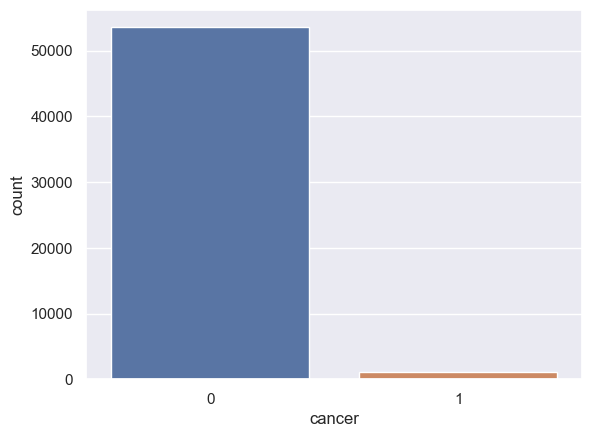

In [18]:
sns.countplot(df_train, x="cancer")


## RIRADS

- 0: require follow-up
- 1: negative (`cancer`=0)
- 2: normal? (`cancer`=0)

<AxesSubplot: xlabel='BIRADS', ylabel='count'>

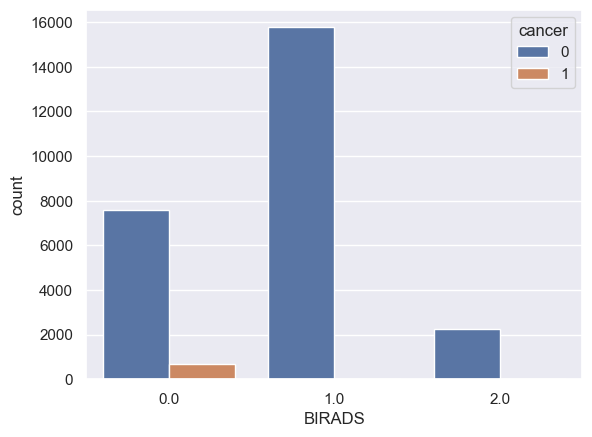

In [34]:
sns.countplot(df_train, x="BIRADS", hue="cancer")

## Age

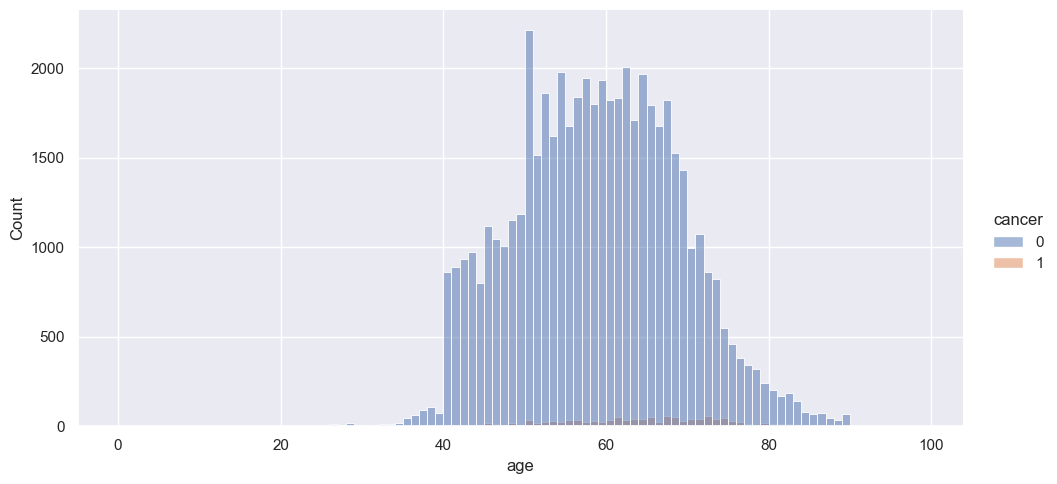

In [60]:
sns.displot(df_train, x="age", height=5, aspect=2, bins=range(100), hue="cancer")


<AxesSubplot: xlabel='difficult_negative_case', ylabel='count'>

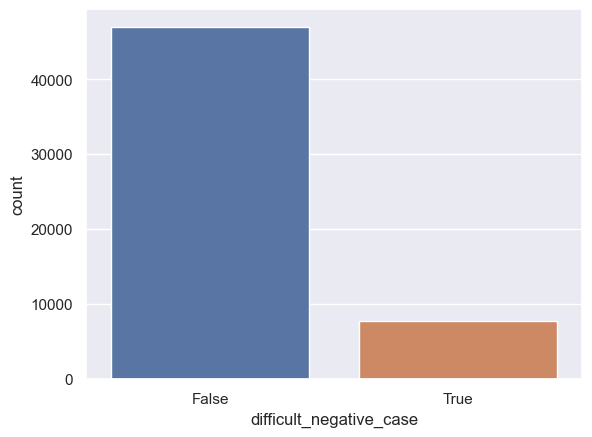

In [13]:
sns.countplot(df_train, x="difficult_negative_case")

In [20]:
df_train[df_train["difficult_negative_case"]==True]["cancer"].value_counts()

0    7705
Name: cancer, dtype: int64

<AxesSubplot: xlabel='laterality', ylabel='count'>

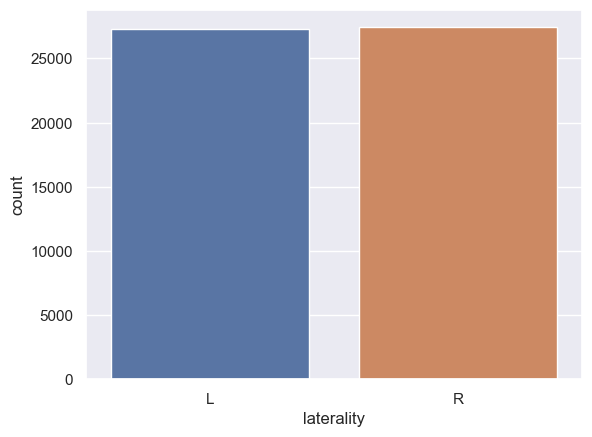

In [14]:
sns.countplot(df_train, x="laterality")


## View

In [15]:
df_train.view.value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

<AxesSubplot: xlabel='view', ylabel='count'>

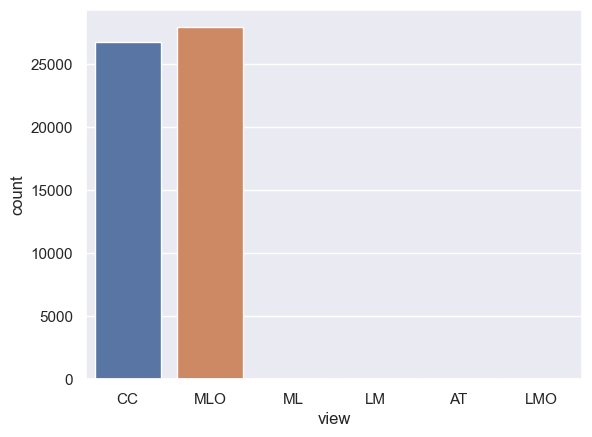

In [16]:
sns.countplot(df_train, x="view")


<AxesSubplot: xlabel='view', ylabel='count'>

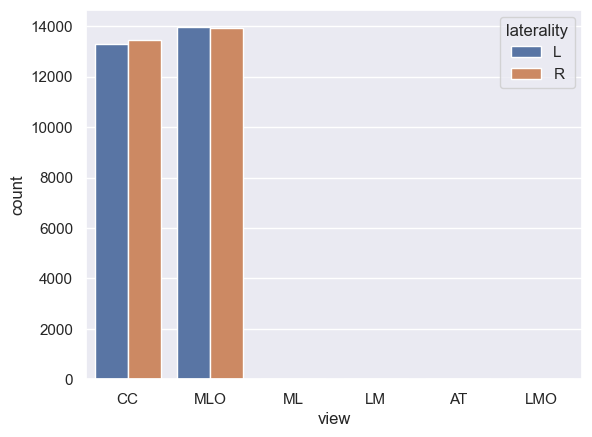

In [64]:
sns.countplot(df_train, x="view", hue="laterality")


## Implant

<AxesSubplot: xlabel='implant', ylabel='count'>

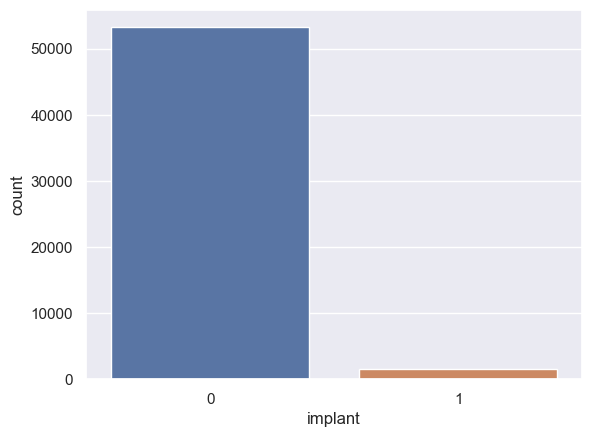

In [21]:
sns.countplot(df_train, x="implant")


<AxesSubplot: xlabel='implant', ylabel='count'>

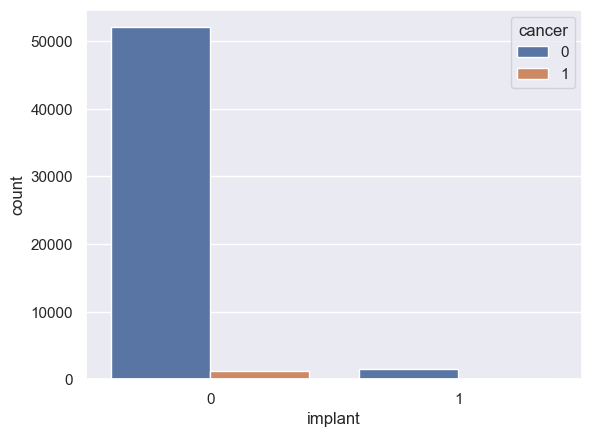

In [61]:
sns.countplot(df_train, x="implant", hue="cancer")


In [62]:
df_train[df_train["implant"] == 1]["cancer"].value_counts()

0    1464
1      13
Name: cancer, dtype: int64

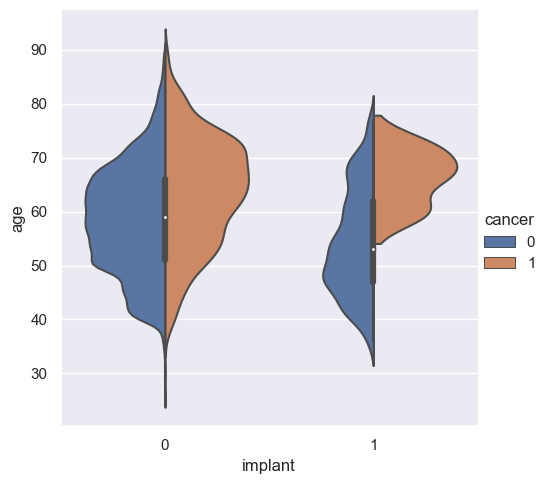

In [29]:
sns.catplot(df_train, x="implant", y="age", hue="cancer", kind="violin", split=True)
